# 🏀 Week 9 Tutorial: Data Transformation & Feature Engineering for Basketball Analytics### 🎯 Learning Objectives- Understand and apply feature engineering to basketball datasets
- Create derived metrics like Efficiency, TS%, and Usage Rate
- Handle missing and categorical data
- Scale and normalize data
- Evaluate redundancy and select features for modeling

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import random
from io import StringIO

csv_data = """Player,Position,PTS,REB,AST,STL,BLK,TO,FGM,FGA,FTM,FTA,MIN,GP,Team_MIN
LeBron James,F,13,7.0,6.0,0,1,0,5,12,3,4,34,1,240
Anthony Davis,C,4,6.0,3.0,2,1,2,1,2,2,2,29,1,240
Anthony Davis,C,9,6.0,0.0,2,1,1,3,6,3,4,21,1,240
LeBron James,F,11,8.0,2.0,0,1,0,4,8,3,4,28,1,240
LeBron James,F,27,4.0,0.0,1,1,3,10,22,7,8,26,1,240
Anthony Davis,C,15,4.0,6.0,1,1,2,5,10,5,6,30,1,240
Austin Reaves,G,14,3.0,4.0,1,0,1,5,11,4,5,32,1,240
D'Angelo Russell,G,21,1.0,7.0,0,0,4,8,17,5,6,35,1,240
LeBron James,F,25,9.0,8.0,1,0,1,10,21,5,6,38,1,240
Anthony Davis,C,22,12.0,2.0,3,2,3,9,18,4,5,36,1,240
Austin Reaves,G,10,2.0,5.0,0,0,2,4,9,2,2,28,1,240
D'Angelo Russell,G,18,3.0,6.0,1,0,1,7,15,4,5,31,1,240
LeBron James,F,30,10.0,7.0,2,1,2,12,24,6,7,40,1,240
Anthony Davis,C,28,15.0,3.0,1,3,2,11,20,6,7,42,1,240
Austin Reaves,G,17,4.0,3.0,1,0,1,6,13,5,6,34,1,240
D'Angelo Russell,G,24,2.0,8.0,1,0,2,9,19,6,7,37,1,240
LeBron James,F,20,7.0,9.0,1,0,3,8,17,4,5,36,1,240
Anthony Davis,C,19,10.0,4.0,2,2,1,7,14,5,6,33,1,240
Austin Reaves,G,12,5.0,4.0,0,0,1,4,10,4,4,30,1,240
D'Angelo Russell,G,15,2.0,5.0,0,0,2,6,14,3,4,29,1,240
LeBron James,F,18,6.0,5.0,1,0,2,7,16,4,5,35,1,240
Anthony Davis,C,23,11.0,1.0,1,2,3,9,17,5,6,38,1,240
Austin Reaves,G,16,3.0,6.0,1,0,0,6,12,4,4,33,1,240
D'Angelo Russell,G,20,1.0,7.0,0,0,1,7,16,6,7,34,1,240
"""

# Read the string data into a DataFrame
df = pd.read_csv(StringIO(csv_data))

# Save the DataFrame to the required CSV file
df.to_csv('clean_box_scores.csv', index=False)

print("✅ 'clean_box_scores.csv' has been successfully created and saved in your Colab environment.")
print("You can now run Cell 3 in your tutorial notebook: df = pd.read_csv('clean_box_scores.csv')")

✅ 'clean_box_scores.csv' has been successfully created and saved in your Colab environment.
You can now run Cell 3 in your tutorial notebook: df = pd.read_csv('clean_box_scores.csv')


In [5]:
# Load dataset
df = pd.read_csv('clean_box_scores.csv')
df.head()

,Player,Position,PTS,REB,AST,STL,BLK,TO,FGM,FGA,FTM,FTA,MIN,GP,Team_MIN
0,LeBron James,F,13,7.0,6.0,0,1,0,5,12,3,4,34,1,240
1,Anthony Davis,C,4,6.0,3.0,2,1,2,1,2,2,2,29,1,240
2,Anthony Davis,C,9,6.0,0.0,2,1,1,3,6,3,4,21,1,240
3,LeBron James,F,11,8.0,2.0,0,1,0,4,8,3,4,28,1,240
4,LeBron James,F,27,4.0,0.0,1,1,3,10,22,7,8,26,1,240


### Create Derived Metrics

In [6]:
df['Efficiency'] = ((df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK']) - (df['FGA'] - df['FGM']) - (df['FTA'] - df['FTM']) - df['TO']) / df['GP']
df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))
df['USG%'] = 100 * ((df['FGA'] + 0.44 * df['FTA'] + df['TO']) * df['MIN']) / df['Team_MIN']

### Handle Missing and Categorical Data

In [7]:
df['REB'].fillna(df['REB'].mean(), inplace=True)
df['AST'].fillna(df['AST'].mean(), inplace=True)
df['Position_Code'] = df['Position'].map({'G':1, 'F':2, 'C':3})

/tmp/ipython-input-4192555271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['REB'].fillna(df['REB'].mean(), inplace=True)
/tmp/ipython-input-4192555271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### Scale and Normalize Data

In [8]:
scaler = StandardScaler()
scaled_cols = ['PTS', 'REB', 'AST', 'Efficiency']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

### Create Rolling Features

In [9]:
df['Rolling_Efficiency'] = df.groupby('Player')['Efficiency'].transform(lambda x: x.rolling(5, min_periods=1).mean())

### Check for Redundant Features

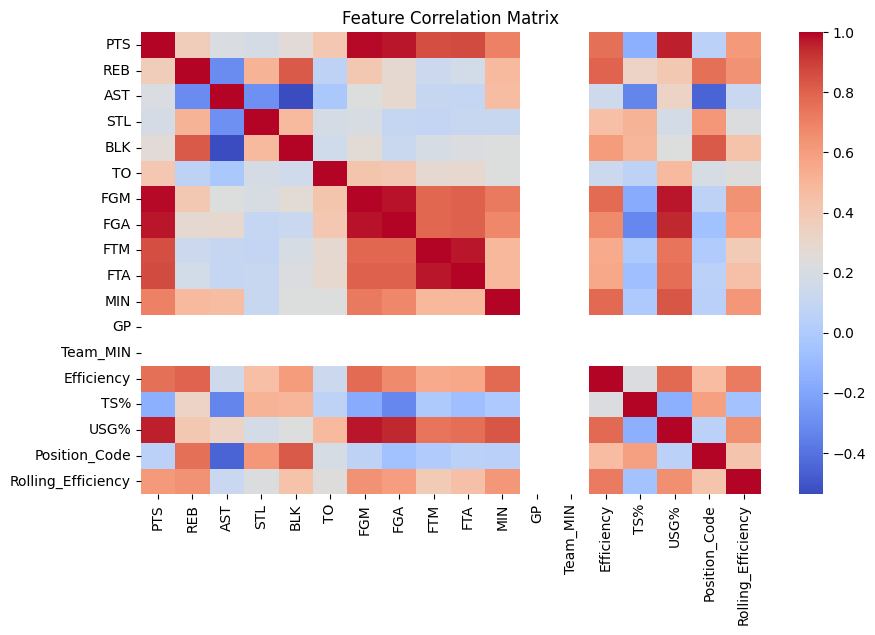

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Save Updated Dataset

In [13]:
df.to_csv('engineered_features.csv', index=False)
print('✅ Engineered dataset saved successfully!')

✅ Engineered dataset saved successfully!
